In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

realDataSet = pd.read_csv(r'real.csv')
df1 = pd.DataFrame(realDataSet,columns= ['x'])

simDataSet = pd.read_csv(r'sim.csv')
df2 = pd.DataFrame(simDataSet,columns= ['x'])
df3 = (df1+df2+10)*5


# df1['dataDiff'] = df1['x'] - df2['x'] #create new column in df1 for data diff 
# print (df1)

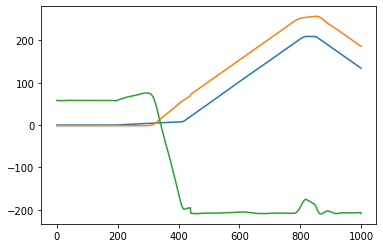

In [51]:
plt.plot(df1)
plt.plot(-df2)
plt.plot(df3)